# Dados de Galton: estudo sobre Alturas 

<br>
<center>
<img src="https://media.giphy.com/media/3o7btPCcdNniyf0ArS/giphy.gif" alt="drawing" width="500px"></center>

In [2]:
#-- carregando as libs
import os
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
#-- importando os dados
galton = pd.read_csv('../data/Galton.csv')
galton.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,1.9939,1.7018,M,1.85928,4
1,1,1.9939,1.7018,F,1.75768,4
2,1,1.9939,1.7018,F,1.75260,4
3,1,1.9939,1.7018,F,1.75260,4
4,2,1.9177,1.6891,M,1.86690,4


#-- dicionário dos dados
 - **Family:** Família de origem
 - **Father:** Altura do Pai
 - **Mother:** Altura da Mãe
 - **Gender:** Sexo do Filho
 - **Height:** Altura do Filho
 - **Kids:** Quantidade de Filhos

In [5]:
#-- verificando as dimensões do dataset
galton.shape

(890, 6)

In [6]:
#-- verificando os tipos das variáveis
galton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 6 columns):
Family    890 non-null int64
Father    890 non-null float64
Mother    890 non-null float64
Gender    890 non-null object
Height    890 non-null float64
Kids      890 non-null int64
dtypes: float64(3), int64(2), object(1)
memory usage: 41.8+ KB


### Análise Exploratória dos Dados

 - Análise exploratória serve para desvendar um pouco do processo gerador de dados. Quanto mais você souber sobre como os dados são gerados, melhor será suas chances de usar a técnica de modelagem mais adequada. Algumas análises são padrões em todos os processos de análise exploratória:
1. Análise de distribuição. Ex: qual a média, mínimo e máximo de cada variável
2. Análise de dados faltantes. Ex: Quais variáveis têm dados faltantes? Qual a proporção de dados faltantes por variável? Porque esses dados estão faltando? É um bug ou uma característica do processo gerador de dados?
3. Variáveis categóricas. Existem variáveis categóricas? Qual a cardinalidade das variáveis categóricas? As categorias são ordenadas ou sem ordem?
4. Correlação. Qual a correlação entre variáveis?

In [7]:
#-- verificando a distribuição dos dados (round - arredonda os dados)
galton.describe().round(4)

,Family,Father,Mother,Height,Kids
count,890.0000,890.0000,890.0000,890.0000,890.0000
mean,104.3191,1.7587,1.6275,1.6956,6.1191
std,56.6543,0.0630,0.0588,0.0911,2.6914
min,1.0000,1.5748,1.4732,1.4224,1.0000
25%,58.0000,1.7272,1.6002,1.6256,4.0000
50%,104.0000,1.7526,1.6256,1.6891,6.0000
75%,155.0000,1.8034,1.6637,1.7704,8.0000
max,204.0000,1.9939,1.7907,2.0066,15.0000


In [8]:
#-- verificando os missing values #.sort_values(), ascending = False ordenar dos dados do maior para o menor
galton.isnull().sum()

Family    0
Father    0
Mother    0
Gender    0
Height    0
Kids      0
dtype: int64

In [9]:
#-- verificando a cardinalidade dos dados // cardinalidade ajuda no agrupamento de dados para criar um análise proporcional , exemplo cargo de pessoas jr., cargo de pessoas sr.
#Recomendado utilizar uma categoria com as proporções próximas

galton.apply(pd.Series.nunique)

Family    196
Father     34
Mother     29
Gender      2
Height     65
Kids       12
dtype: int64

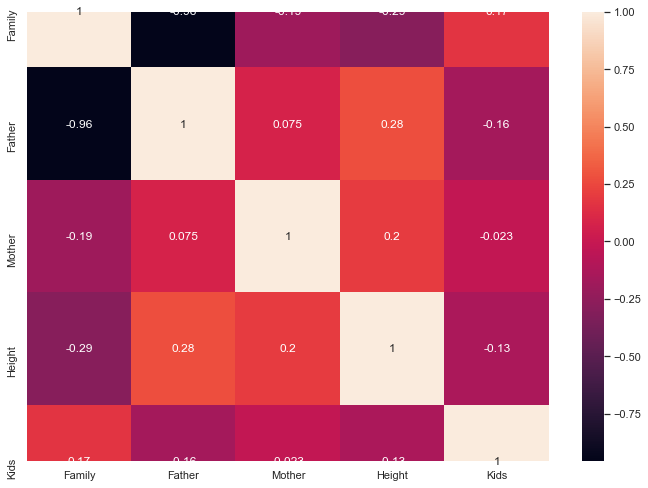

In [14]:
#-- correlação // Ao utilizar o annot ele inclui o valor dentro do gráfico
_ = sns.heatmap(galton.corr(), annot= True)

In [12]:
#formula para ver a correlação numericamente 

galton.corr().sort_values('Father')

,Family,Father,Mother,Height,Kids
Family,1.000000,-0.957761,-0.185941,-0.292005,0.170607
Kids,0.170607,-0.158576,-0.022574,-0.128475,1.000000
Mother,-0.185941,0.074807,1.000000,0.202039,-0.022574
Height,-0.292005,0.276801,0.202039,1.000000,-0.128475
Father,-0.957761,1.000000,0.074807,0.276801,-0.158576


> Correlação acima de 0,70 entre as variáveis independentes 

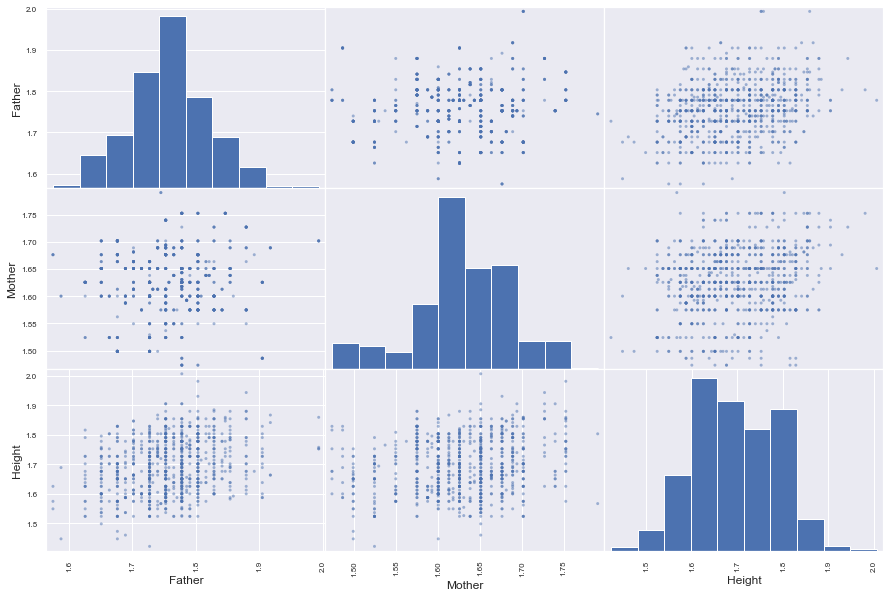

In [15]:
#-- importando scatter matrix
from pandas.plotting import scatter_matrix


#scatter plto não faz muito sentido em utilizar dados continuos com discreto
#continuos - Esta atrelado a alguma unidade - Tempo, Espaço
#discretos - Não está relacionado a uma unidade - Quantidade de mesas em uma sala, salário

continuous_cols = galton.select_dtypes(include=['float']) #-- selecionando os dados numéricos
scatter_matrix(continuous_cols, figsize=(15, 10))
plt.show()

## Parte_1: Ajustando um Modelo de regressão linear simples para determinar a relação entre a Altura do Pai e a Altura do Filho
## Sklearn

In [18]:
#sempre definir os parametros 

Y = galton['Height']
X = galton['Father'].to_frame()

In [19]:
#sempre utilizar o random_state -> isso fará com que o sequencia não se altere


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [55]:
#fit sempre será aplicado no treino e predict sempre no teste
#y = 0,42 * father + 0,96

lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

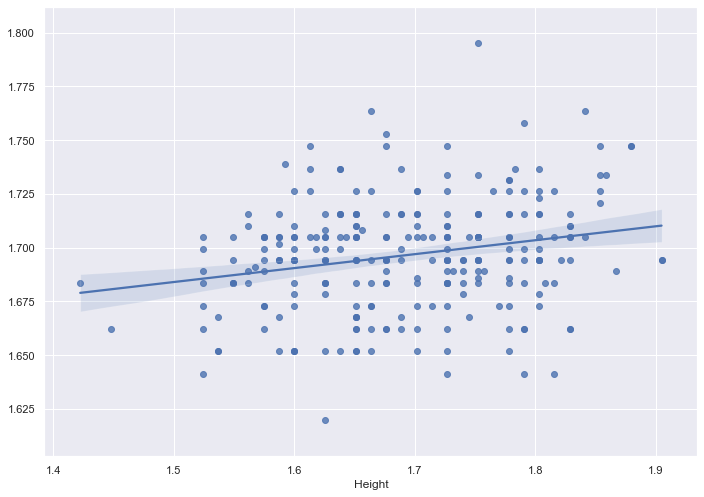

In [21]:
_ = sns.regplot(x=Y_test, y=Y_pred)

In [22]:
#o coeficiente que está multiplicando na variavel independente (altura do pai)
#intercepto - é a constante
#a constante é o menor distancia entre todos os pontos (erro)

beta1=lm.coef_
intercepto=lm.intercept_
print(beta1)
print(intercepto)

[0.4184579]
0.9608757301017266


In [23]:
#iloc é chamado pela posição

X_test.iloc[0]

Father    1.778
Name: 280, dtype: float64

In [24]:
Y_pred[0]

1.7048938696782985

In [25]:
#utilizar a função ou 

intercepto + (beta1[0] * X_test.iloc[0][0])

1.7048938696782985

In [ ]:
#salvado no diretorio #exporta
#shift + tab
#y_test.to_csv('y_test.csv')

In [26]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

0.00791456549467765


**MSE**

$\frac{1}{N}\sum{(y_{test} - y_{pred})^2}$

O MSE calcula o erro quadrático médio das predições do nosso modelo. Quanto maior o MSE, pior é o modelo.

Essa métrica é útil quando temos valores de target mais incomuns e que seriam interessantes que nosso modelo não errasse.

Por outro lado, como os erros são penalizados exponencialmente, erros maiores tem um peso maior do que os erros menores. Então, se o nosso modelo faz apenas uma predição muito, muito ruim, o MSE irá elevar esse erro ao quadrado e, com isso, esse erro ficará ainda pior e acabaremos achando que o nosso modelo está performando pior do que realmente está.

Outro ponto é que a escala do MSE não é a mesma do nosso target (visto que os erros são elevados ao quadrado), então sua interpretação fica mais difícil.

In [29]:
#Calculando o R^2

#quanto maior o mse pior o modelo
#Rˆ2 - significa a correlação ao quadro - O quanto a variavel x explica sobre a variavel em y

sklearn.metrics.r2_score(Y_test, Y_pred)

0.05062269606819625

**R²**

$1 - \frac{\frac{1}{N}\sum{(y_{test} - y_{pred})^2}}{\frac{1}{N}\sum{(y_{test} - \bar{y})^2}}$

O R² é uma métrica que varia entre -∞ e 1 e é uma razão que indica o quão bom o nosso modelo está em comparação com um modelo naive que faz a predição com base no valor médio do target. Quanto maior seu valor, melhor é nosso modelo com relação a esse modelo mais simplista.

Um valor de R² negativo significa que nosso modelo é pior do que se tivéssemos feito a predição com o valor da média. Entretanto, só com essa métrica não conseguimos enxergar a magnitude dos erros do nosso modelo.

## Parte_2: Ajustando um Modelo de regressão linear simples para determinar a relação entre a Altura do Pai e a Altura do Filho.
## Statsmodel

In [30]:
#Ajustando Mod de reg linear na biblioteca statsmodel
#é necessário passar a constante (x é altura do pai)
#Usando a biblioteca statsmodels

import statsmodels.api as sm

X_7 = sm.add_constant(X) #adiciona a cte a base de dados
est7 = sm.OLS(Y, X_7)
est77 = est7.fit()
print(est77.summary())


#r-quadrado x r-quadrado ajustado -> incluir outras variaveis aumenta o valor de r-quadrado  
#r-quadrado - penaliza o fato de você ter jogado muita variavel
#prob - se globalmente o modelo faz sentido  - se o é menor que alfa (5%) faz sentido seguir com ela (pois tem correlação)
#lembrar do p valor (95%)
#p>t - for menor que alfa, mantem se a variavel no modelo
#

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     73.68
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           4.06e-17
Time:                        20:25:08   Log-Likelihood:                 905.47
No. Observations:                 890   AIC:                            -1807.
Df Residuals:                     888   BIC:                            -1797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9918      0.082     12.087      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [31]:
Y_pred = est77.predict(X_7)

In [33]:
mse = sklearn.metrics.mean_squared_error(Y, Y_pred)
print(mse)

0.007653138008839555


In [34]:
#Calculando o R^2
sklearn.metrics.r2_score(Y, Y_pred)

0.07661868898953805

## Parte_3: Ajustando um Modelo de Regressão Linear Multipla usando statsmodel
Utilizando as Variáveis: altura do pai, da mãe e quantidade de filhos

In [35]:
#-- zerando os datasets
Y = []
X = []

In [36]:
Y = galton['Height']
X = galton[['Father', 'Mother', 'Kids']]

In [37]:
#Usando a biblioteca statsmodels
#Modelo COM intercepto
X2 = sm.add_constant(X) #adiciona a cte a base de dados
est = sm.OLS(Y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     39.01
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           1.10e-23
Time:                        20:44:32   Log-Likelihood:                 925.21
No. Observations:                 890   AIC:                            -1842.
Df Residuals:                     886   BIC:                            -1823.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6207      0.111      5.594      0.0

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


## Parte_4: Criando uma nova variável
Utilizando as Variáveis: altura do pai, da mãe e a média da altura dos pais

In [38]:
#Cria uma nova variável que é a média das alturas dos pais
#tentar criar uma nova váriavel através de uma variavel que já existe (Feature - enginer)

galton["Mean_Parents"]= (galton['Father'] + galton['Mother'])/2

In [41]:
#-- zerando os datasets
Y = []
X = []

In [42]:
Y = galton['Height']
X = galton[['Father', 'Mother', 'Mean_Parents']]

In [43]:
#Usando a biblioteca statsmodels
#Modelo COM intercepto
X3 = sm.add_constant(X) #adiciona a cte a base de dados
est = sm.OLS(Y, X3)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                 Height   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.108
Method:                 Least Squares   F-statistic:                     54.64
Date:                Thu, 20 Feb 2020   Prob (F-statistic):           4.19e-23
Time:                        20:48:51   Log-Likelihood:                 921.70
No. Observations:                 890   AIC:                            -1837.
Df Residuals:                     887   BIC:                            -1823.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5668      0.109      5.179   

## Parte_5: Ajustando um Modelo de regressão linear simples para determinar a relação entre a Altura do Pai e a Altura do Filho
## Sklearn

In [44]:
Y = []
X = []

In [45]:
Y = galton['Height']
X = galton[['Father', 'Mother', 'Mean_Parents']]

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

In [47]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

Y_pred = lm.predict(X_test)

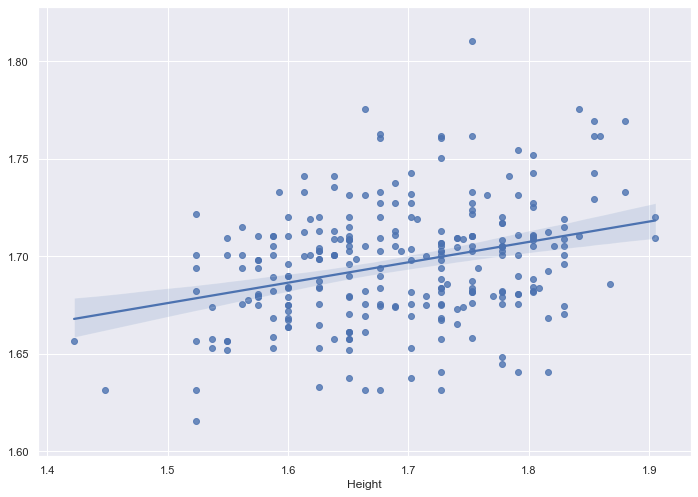

In [48]:
_ = sns.regplot(x=Y_test, y=Y_pred)

In [49]:
beta1=lm.coef_
intercepto=lm.intercept_
print(beta1)
print(intercepto)

[-3.31246461e+12 -3.31246461e+12  6.62492923e+12]
0.5758464105136436


In [50]:
X_test.iloc[0]

Father          1.7780
Mother          1.6510
Mean_Parents    1.7145
Name: 280, dtype: float64

In [51]:
Y_pred[0]

1.7104990974090273

In [52]:
intercepto + (beta1[0] * X_test.iloc[0][0]) + (beta1[1] * X_test.iloc[0][1]) + (beta1[2] * X_test.iloc[0][2])

1.7109375

In [53]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

0.007523416629453191


In [54]:
#Calculando o R^2
sklearn.metrics.r2_score(Y_test, Y_pred)

0.09754224652898957